<a href="https://colab.research.google.com/github/Jordy-Rodrigues/M-delo-KNN/blob/main/M%C3%B3delo_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREVENDO FAIXA DE RENDA DE ESTUDANTES COM MACHINE LEARNING

In [426]:
# IMPORTAR AS BIBLIOTECAS NECESSÁRIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# BIBLIOTECAS DE MACHINE LEARNING
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

# BIBLIOTECA PARA PLOTAR GRÁFICOS
from mlxtend.plotting import plot_decision_regions

In [427]:
# CARREGAR A BASE DE DADOS
base = pd.read_csv('/content/drive/MyDrive/Placement_Data_Full_Class.csv')
base.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [428]:
# EXCLUIR A COLUNA 'sl_no', ELA NÃO SERÁ NECESSÁRIA PARA A ANÁLISE DE DADOS
base.drop (['sl_no'],1, inplace = True)
base.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [429]:
# MOSTRAR INFORMAÇÕES DA BASE DE DADOS
print(base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


In [430]:
# MOSTRAR DESCRIÇÕES DA BASE DE DADOS
print(base.describe())

            ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000   
mean    67.303395   66.333163   66.370186   72.100558   62.278186   
std     10.827205   10.897509    7.358743   13.275956    5.833385   
min     40.890000   37.000000   50.000000   50.000000   51.210000   
25%     60.600000   60.900000   61.000000   60.000000   57.945000   
50%     67.000000   65.000000   66.000000   71.000000   62.000000   
75%     75.700000   73.000000   72.000000   83.500000   66.255000   
max     89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000  


In [456]:
# INCLUIR DADOS CATEGORICOS (OBJECT) PARA FAZER ANÁLISE NO TRATAMENTO DE DADOS 
base.describe(include = ['object'])

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,204,204,204,204,204,204,204,204
unique,2,2,2,3,2,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,134,110,127,112,145,134,116,143


## TRATAMENTO DE DADOS

In [432]:
# REMOVER AS LINHAS QUE POSSUEI O NOME 'Others' NA COLUNA 'degree_t'
base = base [base['degree_t'] != 'Others']

In [433]:
# NA COLUNA 'salary' MUDAR TODOS OS NOMES DE NaN PARA 0
base ['salary'].fillna(0, inplace= True)
base ['salary'].describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


count       204.000000
mean     202544.117647
std      154464.984840
min           0.000000
25%           0.000000
50%      240000.000000
75%      285500.000000
max      940000.000000
Name: salary, dtype: float64

In [434]:
# OBS: A MEDIANA É 240.000, 50%

In [435]:
# TRANSFORMAR A COLUNA 'salary' EM VALORES BINÁRIOS
base.loc [base ['salary'] < 240000, 'salary'] = 0
base.loc [base ['salary'] >= 240000, 'salary'] = 1

# VER VALORES ÚNICOS
base ['salary'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


array([1., 0.])

In [436]:
# CONVERTER DADOS CATEGÓRICOS EM VARIÁVEIS FICTÍCIAS OU INDICADORAS PARA MAIPULAÇÃO DE DADOS USANDO PANDAS
base_dummy = pd.get_dummies (base)
base_dummy.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1.0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,0.0,0,1,1,0,...,0,1,0,1,0,1,1,0,0,1
2,65.00,68.00,64.00,75.0,57.80,1.0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,1
3,56.00,52.00,52.00,66.0,59.43,0.0,0,1,1,0,...,0,1,0,1,1,0,0,1,1,0
4,85.80,73.60,73.30,96.8,55.50,1.0,0,1,1,0,...,1,0,1,0,1,0,1,0,0,1


# MATRIZ DE CORRELAÇÃO

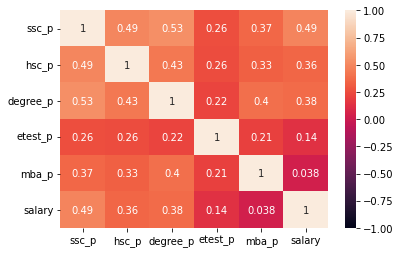

In [437]:
# CRIAR GRÁFICO COM SEABORN
sns.heatmap (base.corr(), annot= True, vmin= -1, vmax= 1)
plt.show()

In [438]:
# OBS: NA LINHA salary A COLUNA ssc_p E hsc_p TEM MAIOR CORRELAÇÃO 

# ANÁLISE GRÁFICA

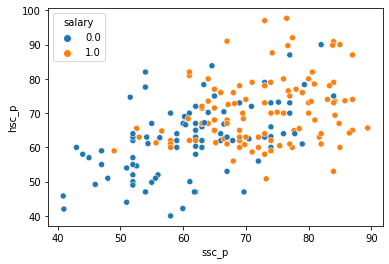

In [439]:
# CRIAR GRÁFICO REPRESENTANDO AS NOTAS DE ALUNOS DO ENSINO MÉDIO
sns.scatterplot (data = base, x = 'ssc_p', y = 'hsc_p', hue = 'salary')
plt.show()

In [440]:
# OBS: NO GRÁFICO A COR AZUL REPRESENTA SALÁRIOS A BAIXO DA MEDIANA E NA COR LARANJA SALÁRIOS A CIMA DA MEDIANA
# PODE-SE OBSERVAR TAMBÉM QUE QUANTO MAIOR A NOTA DO ALUNO MAIOR SEU SALÁRIO REPRESENTADO PELA COR LARANJA
# ESSAS CARACTERÍSTICAS SERÃO PARA OS DOIS GRÁFICOS, O DE CIMA E O DE BAIXO.

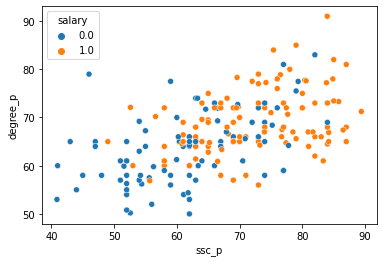

In [441]:
# CRIAR GRÁFICO REPRESENTANDO AS NOTAS DE ALUNOS DO ENSINO SUPERIOR
sns.scatterplot (data = base, x = 'ssc_p', y = 'degree_p', hue = 'salary')
plt.show()

## APLICANDO MODELO DE MACHINE LEARNING KNN

In [442]:
# DEFINIR A VARIÁVEL X DEPENDENTE E A VARIÁVEL Y INDEPENDENTE
x = np.array (base_dummy.drop (['salary'], axis = 1))
y = np.array (base_dummy ['salary'])

In [443]:
y

array([1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.])

In [444]:
x

array([[67.  , 91.  , 58.  , ...,  1.  ,  0.  ,  1.  ],
       [79.33, 78.33, 77.48, ...,  0.  ,  0.  ,  1.  ],
       [65.  , 68.  , 64.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [67.  , 67.  , 73.  , ...,  0.  ,  0.  ,  1.  ],
       [74.  , 66.  , 58.  , ...,  1.  ,  0.  ,  1.  ],
       [62.  , 58.  , 53.  , ...,  1.  ,  1.  ,  0.  ]])

In [445]:
# SEPARAR A BASE DE DADOS EM TREINO E TESTE
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size= 0.2, random_state = 0)

In [446]:
# NORMALIZAR OS DADOS 
sc_x = StandardScaler()
x_treino = sc_x.fit_transform (x_treino)
x_teste = sc_x.transform (x_teste)

In [447]:
# CRIAR A ESTRUTURA DO MODELO
classe = neighbors.KNeighborsClassifier (n_neighbors= 19, metric= 'euclidean') # NÚMERO DE VIZINHOS DEFINIDO FOI 19 PARA O MODELO

In [448]:
# TREINAR O MODELO
classe.fit (x_treino, y_treino)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [449]:
# VER A PONTUAÇÃO DO MODELO COM DADOS DE TESTE
acuracia = classe.score (x_teste,y_teste)
acuracia

0.926829268292683

# VISUALIZAR OS RESULTADOS DO MODELO EM GRÁFICO

In [450]:
# CRIAR GRÁFICO
def knn_comparison (data, k):
  x = data[['ssc_p','hsc_p']].values
  y = data['salary'].astype(int).values
  knn = neighbors.KNeighborsClassifier (n_neighbors= k)
  knn.fit (x, y)
  plot_decision_regions(x,y, clf=knn)
  plt.xlabel ('ssc_p')
  plt.ylabel ('hsc_p')
  plt.title ('k=' + str(k))
  plt.show()


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


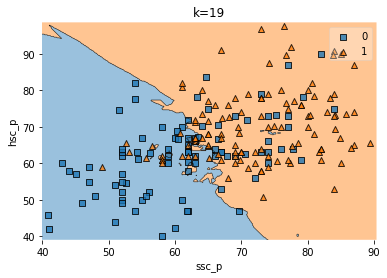

In [451]:
# MOSTRAR O GRÁFICO
knn_comparison(data = base_dummy, k=19)

# EXEMPLO UTILIZANDO NA PRÁTICA

In [452]:
# DIGAMOS QUE EU TENHA UM AMIGO QUE NÃO ESTA NO DATASET, E QUE EU QUEIRA PREVER A FAIXA DE RENDA DELE
# SUPONHAMOS QUE EU TENHA TODOS OS DADOS COM MIGO, MENOS O DADO QUE CORRESPONDA A COLUNA SALARIO

In [453]:
# MOSTRAR A 1ª LINHA DO DATASET. O MÉTODO. T TRANSPÕE A TABELA, DEIXANDO-A NA VERTICAL
base_dummy.head(1).T

,0
ssc_p,67.0
hsc_p,91.0
degree_p,58.0
etest_p,55.0
mba_p,58.8
salary,1.0
gender_F,0.0
gender_M,1.0
ssc_b_Central,0.0
ssc_b_Others,1.0


In [454]:
# DADOS DO MEU AMIGO 
exemplo = np.array([95,95,60,60,50,1,0,1,0,0,1,0,1,1,1,0,0,1,0,1,1,0])

# ALTERANDO O FORMATO
exemplo = exemplo.reshape(1,-1)

# NORMALIZAR OS NÚMEROS
exemplo = sc_x.transform(exemplo)

# PREVENDO A SUA FAIXA DE RENDA
prediçao = classe.predict(exemplo)

# MOSTRAR RESULTADO
print(prediçao)

[1.]


In [455]:
# OBS: PARA MUDAR O VALOR DA PREDIÇÃO É NECESSÁRIO MUDAR OS VALORES NA ARRAY, EM QUE '0', RENDA MENOR QUE 240.000 E '1', RENDA MAIOR OU IGUAL A 240.000